# Importing and data prep

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from model_development.data_prep import transform_init_data, dichotomise_sex
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_log_error

import seaborn as sns

In [171]:
# Initialise seed for reproducibility of random operations such as train-test split
seed = 11000

In [172]:
training_data = pd.read_csv("../data/train.csv")
training_data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [173]:
training_data.shape

(750000, 9)

## Optional - include initial data  
The training data was generated from actual collected data. We can opt-in to include this data in the model training as well.  
If so, it will also be randomly split into train-test, the same as the generated data. No special treatment here.

In [174]:
INCLUDE_INITIAL_DATA = False

In [175]:
initial_data = pd.read_csv("../data/calories.csv")
initial_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [176]:
transformed = transform_init_data(initial_data)
transformed.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,in14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,in14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,in11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,in16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,in17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [177]:
if INCLUDE_INITIAL_DATA:
    training_data = pd.concat([training_data, transformed])

----

In [178]:
training_data = dichotomise_sex(training_data)

## Train test split

In [179]:
train, test = train_test_split(training_data, random_state = seed, train_size=0.8)

train.shape

(600000, 9)

In [180]:
test.shape

(150000, 9)

## Baseline - linear regression model

In [181]:
lm = LinearRegression()

In [182]:
lm.fit(train.drop(["Calories"], axis = 1),
    train["Calories"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [183]:
predictions = lm.predict(test.drop(["Calories"], axis = 1))

Predictions possibly have <0 values, which doesn't make sense AND breaks the calculation of the RMSLE. We'll fix those values to 0

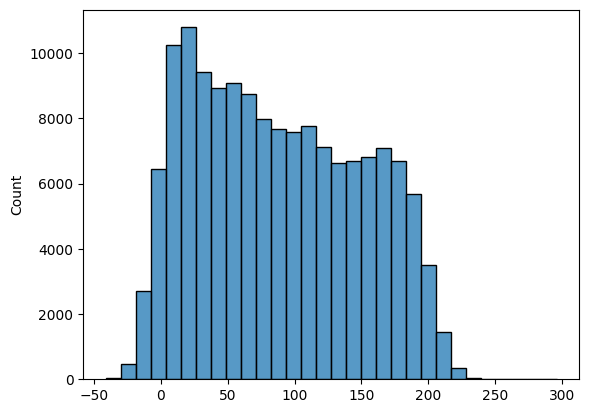

In [184]:
_ = sns.histplot(predictions, bins=30)

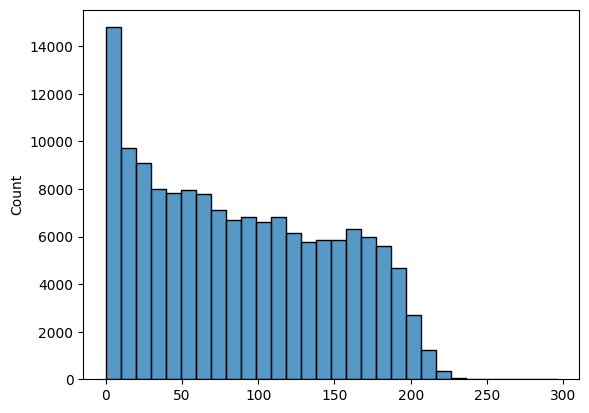

In [185]:
predictions[predictions < 0] = 0
_ = sns.histplot(predictions, bins=30)

In [186]:
rmsle_lm =  root_mean_squared_log_error(test["Calories"],
    predictions)

rmsle_lm

0.5658597185776867

In [187]:
print(f"""RMSLE table per models: 
LM:     {round(rmsle_lm, 3)}

""")

RMSLE table per models: 
LM:     0.566


